In [1]:
import pandas as pd ; import numpy as np ; import seaborn as sns ; import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,...,NaN,360.0,NaN,0,0,0,0,0,1,0
1,flat,emaar mgf the palm drive,sector 66,2.80,14358.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,...,1950.0,1920.0,1600.0,1,1,0,1,0,2,69
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,...,1689.0,NaN,1082.0,0,0,0,1,0,0,103
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,...,NaN,3240.0,NaN,0,1,0,0,0,1,20
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,...,NaN,1800.0,NaN,1,0,0,1,0,1,24


In [4]:
df.shape

(3674, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674 entries, 0 to 3673
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3674 non-null   object 
 1   society              3673 non-null   object 
 2   sector               3674 non-null   object 
 3   price                3657 non-null   float64
 4   price_per_sqft       3657 non-null   float64
 5   area                 3657 non-null   float64
 6   areaWithType         3674 non-null   object 
 7   bedRoom              3674 non-null   int64  
 8   bathroom             3674 non-null   int64  
 9   balcony              3674 non-null   object 
 10  floorNum             3652 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3674 non-null   object 
 13  super_built_up_area  1874 non-null   float64
 14  built_up_area        1689 non-null   float64
 15  carpet_area          1872 non-null   f

In [7]:
df.duplicated().sum()

4

In [8]:
df.drop_duplicates(inplace= True)

### property_type

<Axes: xlabel='property_type'>

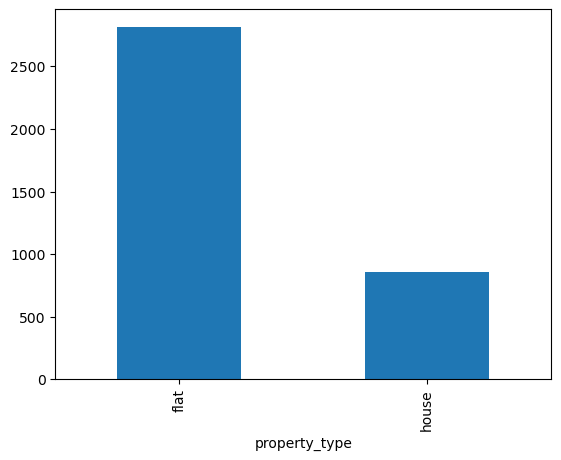

In [10]:
df['property_type'].value_counts().plot(kind='bar')

### society

In [42]:
df['society'].value_counts()

society
independent                             482
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
pooja apartment                           1
south city 1 floors                       1
aipl peaceful homes                       1
tashee capital gateway                    1
huda housing board society                1
Name: count, Length: 675, dtype: int64

In [12]:
df['society'].value_counts().shape

(675,)

In [14]:
society_counts = df['society'].value_counts()

# frequency dist. for the societies
frequency_bins = {
    'very high (>100)' : (society_counts > 100).sum() ,
    'high (50-100)': ((society_counts >= 50) & (society_counts <= 100)).sum(),
    'average (10-49)' : ((society_counts >= 10) & (society_counts < 50)).sum(),
    'low (2-9)' : ((society_counts > 1) & (society_counts < 10)).sum(),
    'very low (1)' : (society_counts < 2).sum()
}
frequency_bins

{'very high (>100)': 1,
 'high (50-100)': 2,
 'average (10-49)': 92,
 'low (2-9)': 272,
 'very low (1)': 308}

In [41]:
df['society'].value_counts().values[:56].sum()

1827

In [39]:
df['society'].value_counts().values[56:].sum()

1842

<Axes: xlabel='society'>

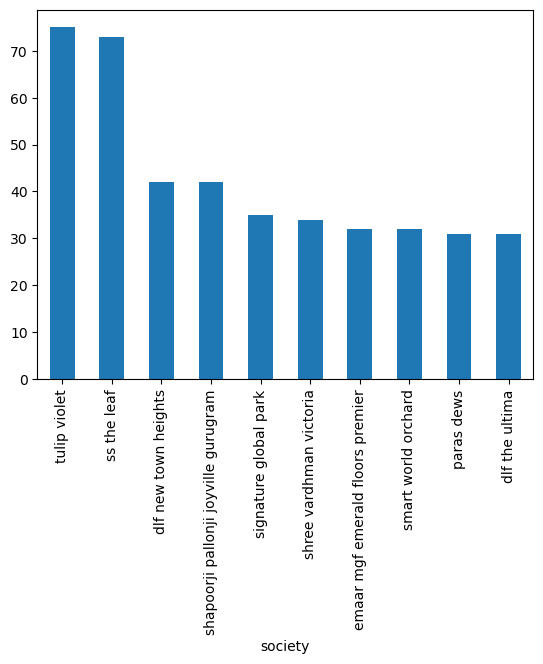

In [18]:
# top 10 socities 
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [19]:
df['society'].isnull().sum()

1

In [20]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3463,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,1,0


### sector

In [53]:
df['sector'].value_counts()

sector
sohna road    154
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 17a      3
sector 73       3
sector 27       3
sector 17b      3
sector 37       1
Name: count, Length: 113, dtype: int64

In [48]:
df['sector'].value_counts().shape # unique sectors

(113,)

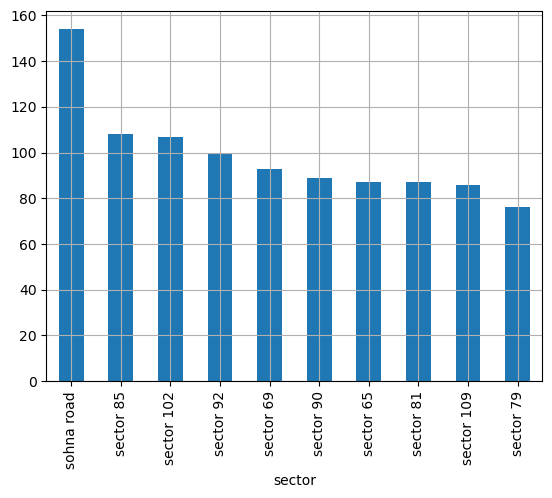

In [47]:
df['sector'].value_counts().head(10).plot(kind='bar') # top 10 sectors
plt.grid(True)

In [50]:
# frequency dist. for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "very High (>100)": (sector_counts > 100).sum(),
    "high (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'very High (>100)': 3,
 'high (50-100)': 25,
 'average (10-49)': 62,
 'low (2-9)': 22,
 'very Low (1)': 1}

### Price

In [54]:
df['price'].isnull().sum()

17

In [68]:
df.price.shape

(3670,)

In [55]:
df['price'].describe()

count    3653.000000
mean        2.534873
std         2.981339
min         0.070000
25%         0.950000
50%         1.540000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [60]:
p_describe('price')

count    3653.000000
mean        2.534873
std         2.981339
min         0.070000
25%         0.950000
50%         1.540000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [63]:
# This is the key line to activate a grid for all subsequent plots
sns.set_style("whitegrid") 

<Axes: xlabel='price', ylabel='Count'>

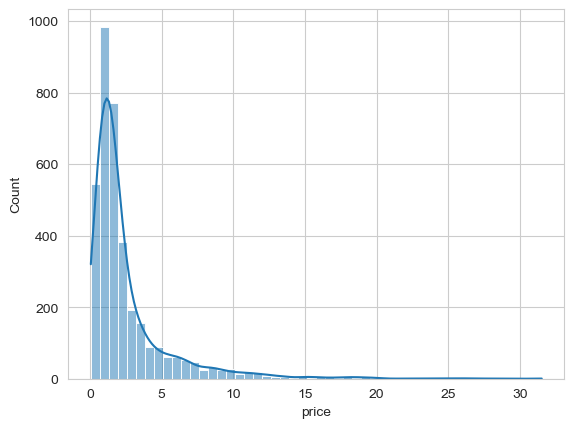

In [64]:
sns.histplot(df.price,kde = True,bins=50)

<Axes: xlabel='price'>

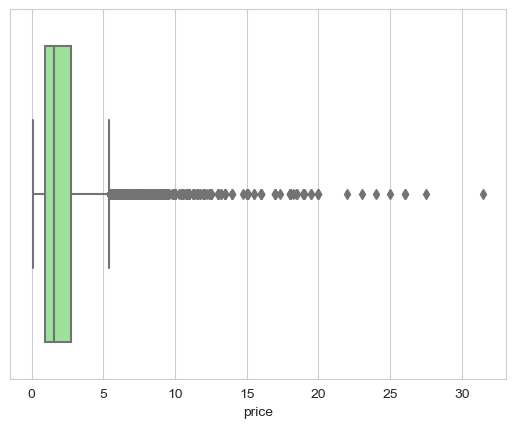

In [67]:
sns.boxplot(x=df.price , color='lightgreen')

In [69]:
# skewness and kurtosis
skewness = df.price.skew() ; kurtosis = df.price.kurt()
print(skewness , kurtosis)

3.2804892498971503 14.941957338481647


In [70]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.292
Name: price, dtype: float64

In [74]:
# identify potential outliers using IQR method
q1 = df.price.describe()['25%'] ; q3 = df.price.describe()['75%']
IQR = q3 - q1
IQR

1.8

In [75]:
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
print(lower_bound , upper_bound)

-1.7500000000000002 5.45


In [83]:
outliers = df[(df.price < lower_bound) | (df.price > upper_bound)]
outliers.shape

(424, 23)

In [84]:
outliers['price'].describe()

count    424.000000
mean       9.238538
std        4.069617
min        5.460000
25%        6.455000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

In [87]:
# price binning
bins = [0 , 1, 2 ,3 ,5 , 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
aa = pd.cut(df['price'], bins = bins , labels = bin_labels , right = False)
aa

0         3-5
1         2-3
2         1-2
3       10-20
4         2-3
        ...  
3669      0-1
3670      1-2
3671      3-5
3672      0-1
3673      0-1
Name: price, Length: 3670, dtype: category
Categories (7, object): ['0-1' < '1-2' < '2-3' < '3-5' < '5-10' < '10-20' < '20-50']

<Axes: xlabel='price'>

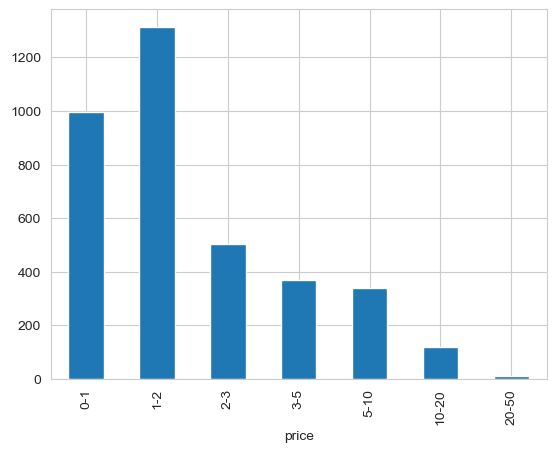

In [91]:
aa.value_counts().sort_index().plot(kind='bar')

In [95]:
# ecdf plot 
ecdf = df.price.value_counts().sort_index().cumsum() / len(df.price)
ecdf

price
0.07     0.000272
0.16     0.000545
0.17     0.000817
0.19     0.001090
0.20     0.003270
           ...   
24.00    0.994005
25.00    0.994278
26.00    0.994823
27.50    0.995095
31.50    0.995368
Name: count, Length: 473, dtype: float64

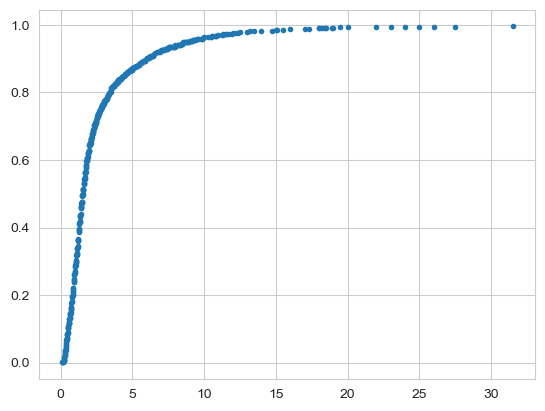

In [96]:
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')

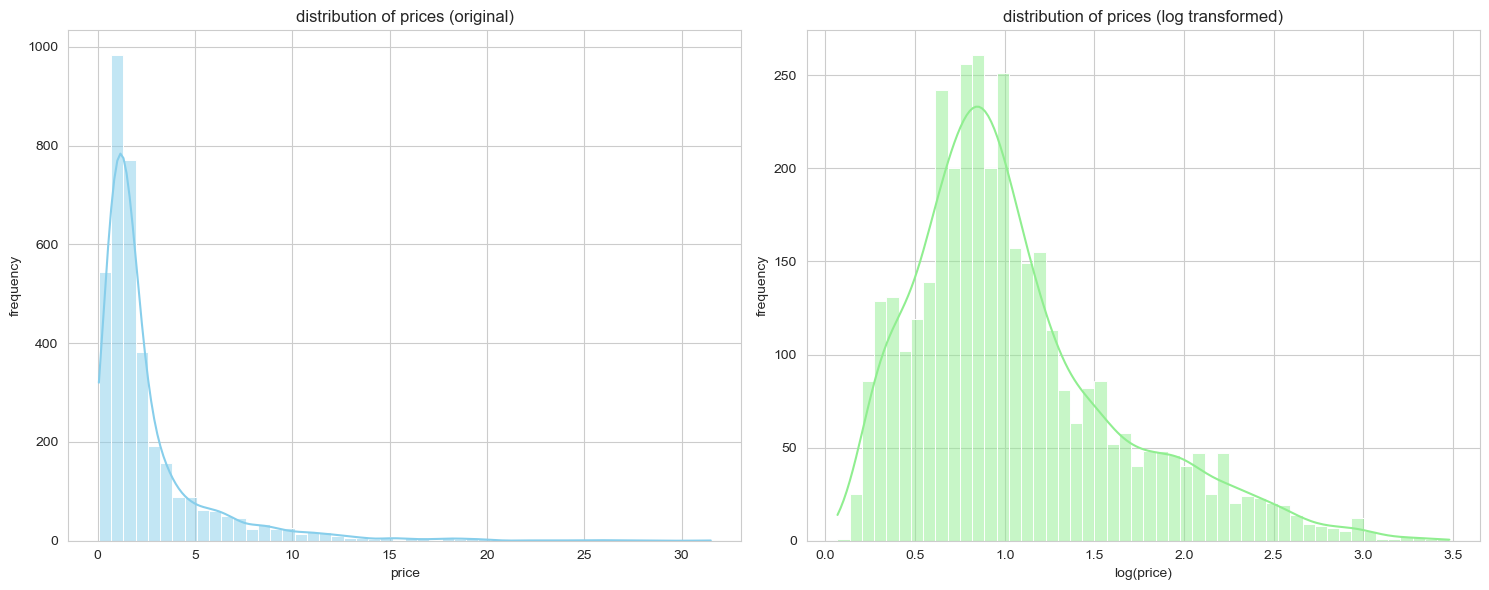

In [100]:
plt.figure(figsize=(15, 6))

# dist. plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df.price , kde = True, bins=50, color='skyblue')
plt.title('distribution of prices (original) ')
plt.ylabel('frequency')

# dist. plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot( np.log1p(df.price) , kde = True, bins=50, color='lightgreen')
plt.title('distribution of prices (log transformed)')
plt.ylabel('frequency')
plt.xlabel('log(price)')

plt.tight_layout()
plt.show()

In [101]:
skewness_l = np.log1p(df['price']).skew()
kurtosis_l = np.log1p(df['price']).kurt()

print(skewness_l,kurtosis_l)

1.0731740756633918 0.9656939299988467


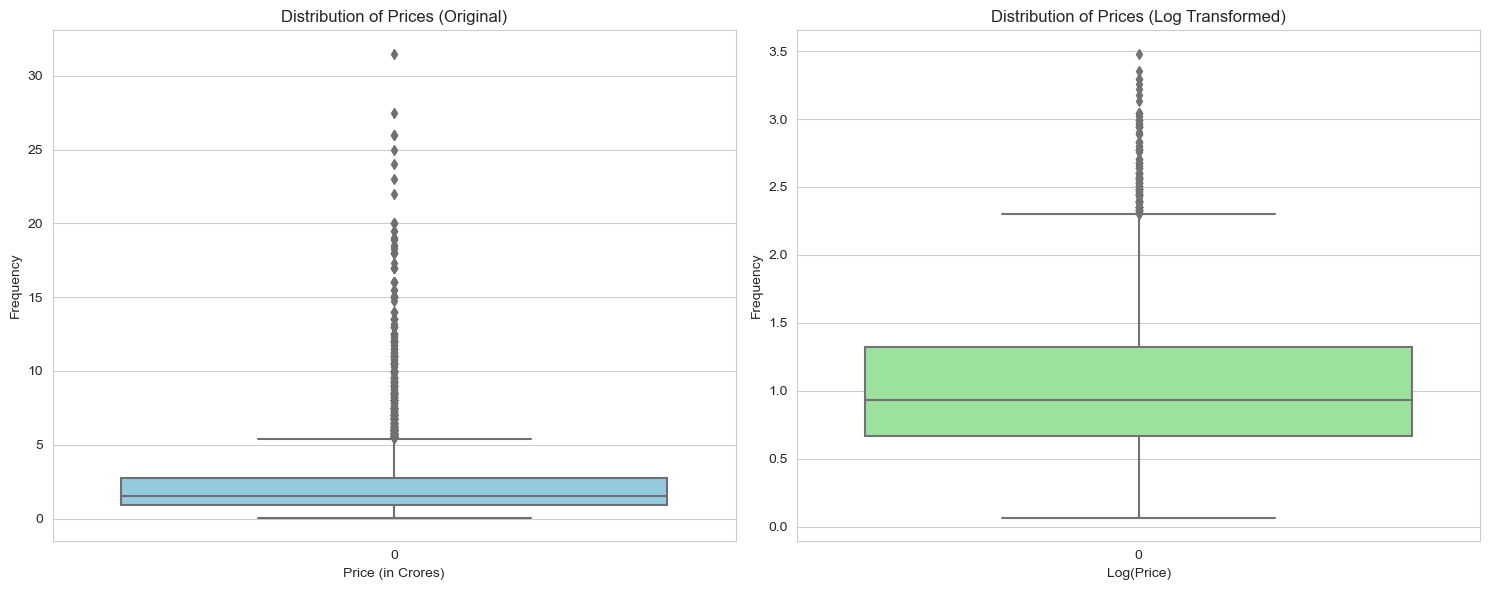

In [102]:
plt.figure(figsize=(15, 6))

# dist.plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# dist. plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [103]:
df.price_per_sqft.isnull().sum()

17

In [105]:
df.price_per_sqft.describe()

count      3653.000000
mean      13894.319737
std       23222.664794
min           4.000000
25%        6818.000000
50%        9022.000000
75%       13888.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

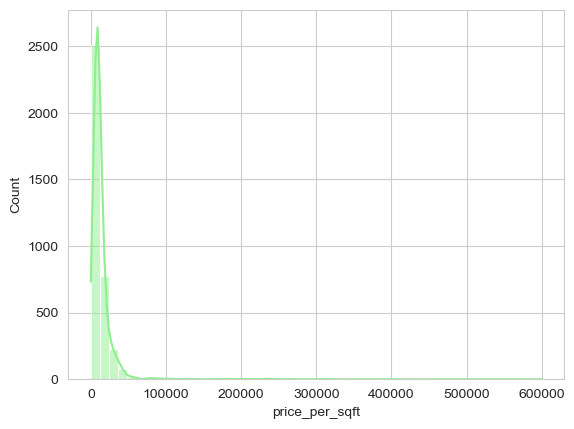

In [107]:
sns.histplot(df.price_per_sqft, kde=True, color='lightgreen', bins= 50 )

<Axes: >

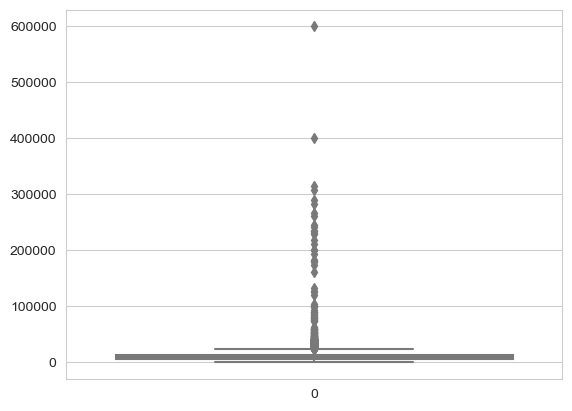

In [108]:
sns.boxplot(df.price_per_sqft, color = 'lightblue')

### bedroom

In [110]:
df.bedRoom.isnull().sum()

0

<Axes: xlabel='bedRoom'>

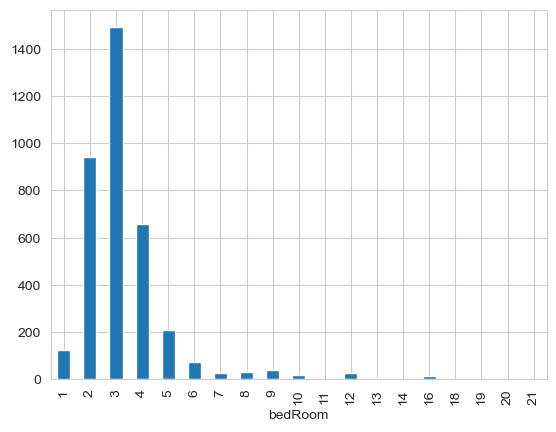

In [113]:
df.bedRoom.value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

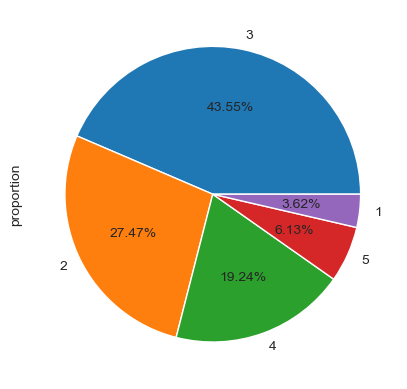

In [114]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [116]:
### bathroom

df.bathroom.isnull().sum()

0

<Axes: xlabel='bathroom'>

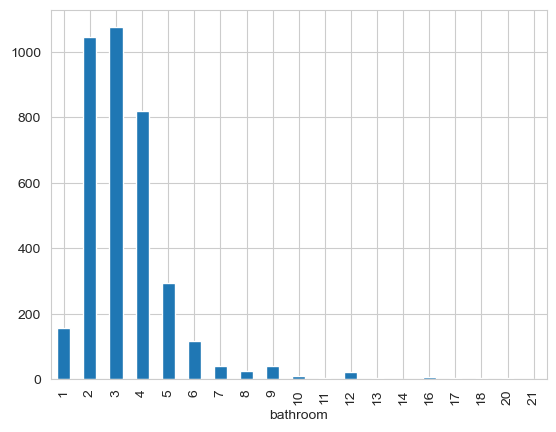

In [117]:
df.bathroom.value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

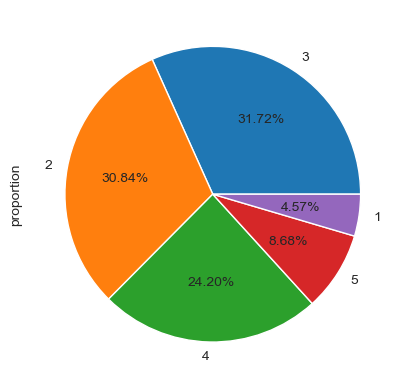

In [118]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### balcony

In [119]:
df.balcony.isnull().sum()

0

<Axes: xlabel='balcony'>

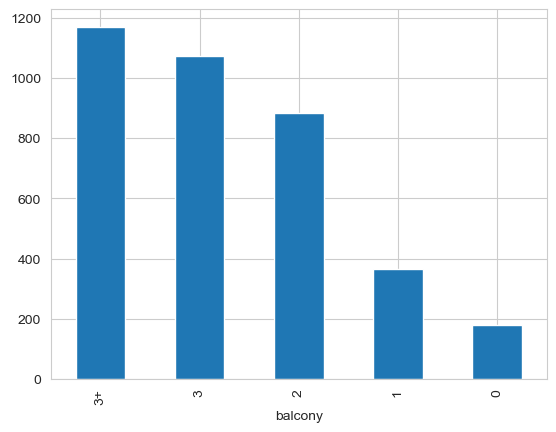

In [120]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

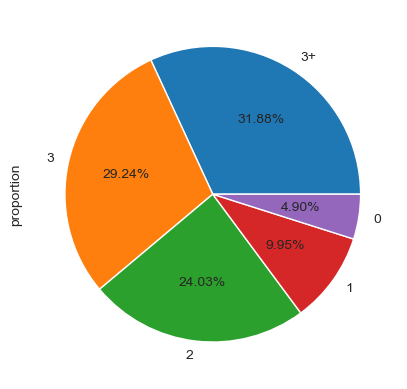

In [121]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### floorNum

In [122]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,1,0
1,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69
2,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,0,103
3,3.0,NaN,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,1,20
4,1.0,South,Old Property,NaN,1800.0,NaN,1,0,0,1,0,1,24


In [123]:
df['floorNum'].isnull().sum()

22

In [124]:
df['floorNum'].describe()

count    3648.000000
mean        6.811952
std         6.014401
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

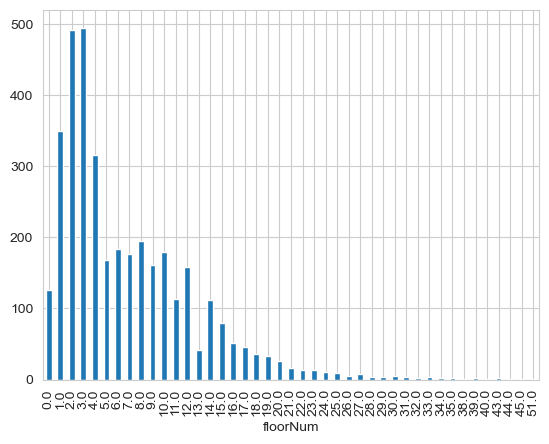

In [125]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

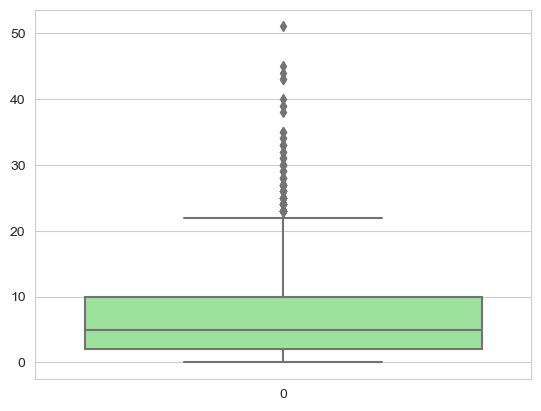

In [126]:
sns.boxplot(df['floorNum'], color='lightgreen')

### facing

In [127]:
df['facing'].isnull().sum()

1039

In [128]:
df['facing'].fillna('NA',inplace=True)

In [129]:
df['facing'].value_counts()

facing
NA            1039
East           623
North-East     623
North          387
West           248
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

### agePossession

In [130]:
df['agePossession'].isnull().sum()

0

In [131]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           592
Moderately Old         562
Undefined              304
Old Property           301
Under Construction     265
Name: count, dtype: int64

### areas

In [132]:
# super built up area
df['super_built_up_area'].isnull().sum()

1797

In [133]:
df['super_built_up_area'].describe()

count     1873.000000
mean      1925.504832
std        764.525564
min         89.000000
25%       1479.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [134]:
df['super_built_up_area'].describe()

count     1873.000000
mean      1925.504832
std        764.525564
min         89.000000
25%       1479.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [143]:
# dropna works internally no need to put it explicitly
#sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: xlabel='super_built_up_area', ylabel='Count'>

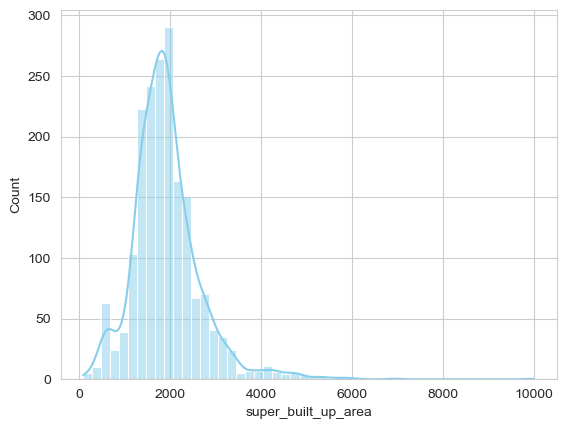

In [139]:
sns.histplot(df['super_built_up_area'], bins=50, color='skyblue', kde=True)

<Axes: >

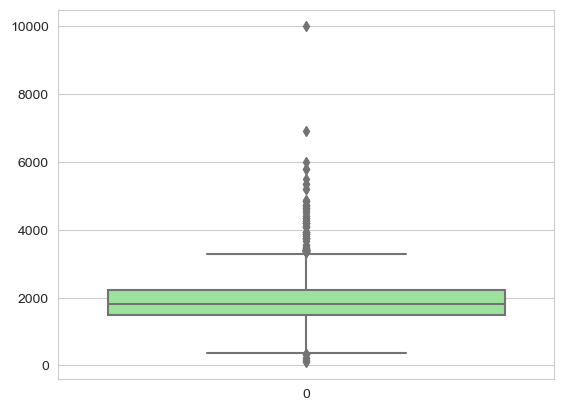

In [137]:
sns.boxplot(df['super_built_up_area'], color='lightgreen')

In [140]:
# built up area
df['built_up_area'].isnull().sum()

1983

In [141]:
df['built_up_area'].describe()

count      1687.000000
mean       2381.357457
std       17958.674653
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

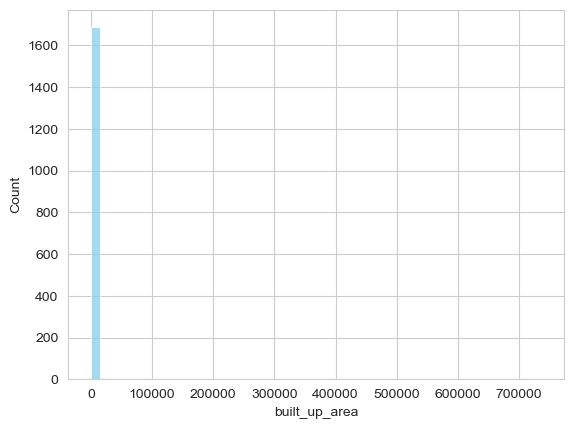

In [142]:
sns.histplot(df['built_up_area'], bins=50, color='skyblue', kde=False)

<Axes: >

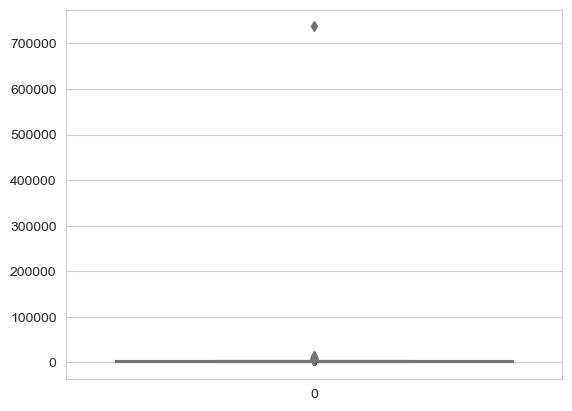

In [144]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

In [145]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,1,0
1,1,1,0,1,0,2,69
2,0,0,0,1,0,0,103
3,0,1,0,0,0,1,20
4,1,0,0,1,0,1,24
...,...,...,...,...,...,...,...
3669,0,0,0,0,0,1,66
3670,0,0,0,0,0,0,126
3671,0,0,1,0,0,1,41
3672,0,0,0,0,0,1,37


### additional rooms

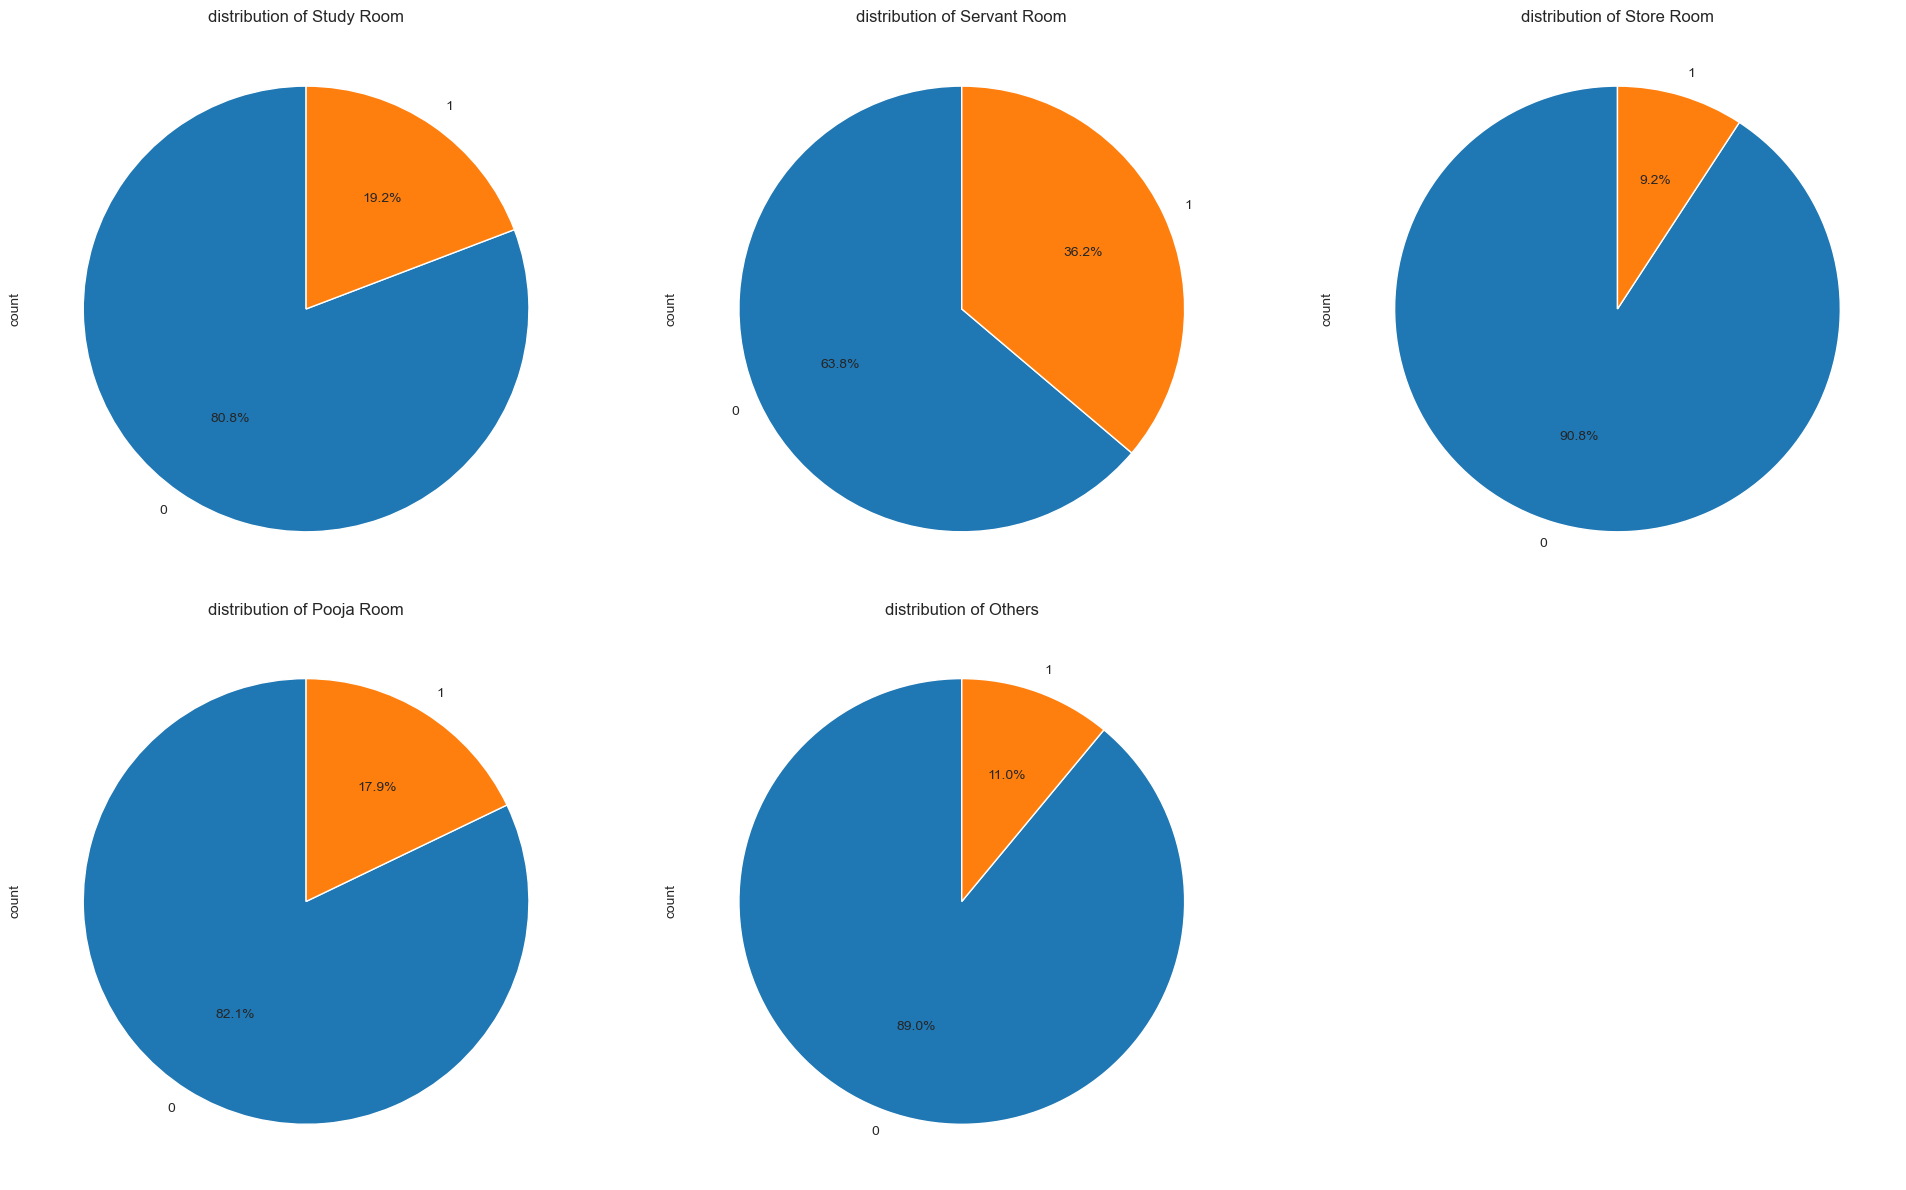

In [154]:
plt.figure(figsize=(20, 12))

for i , rooms in enumerate(['study room','servant room','store room','pooja room','others'],1): # this 1 is put to stop start 0
    ax = plt.subplot(2,3,i)
    df[rooms].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title( f'distribution of {rooms.title()}' )
plt.tight_layout()
plt.show()

### furnishing_type

In [155]:
df['furnishing_type'].value_counts()

furnishing_type
1    2408
0    1053
2     209
Name: count, dtype: int64

<Axes: ylabel='count'>

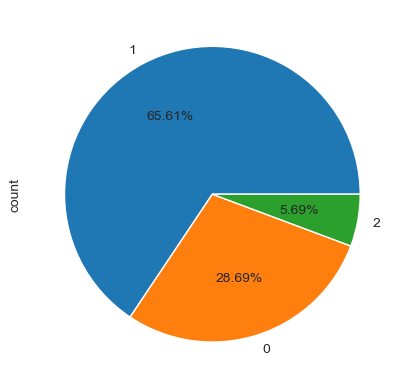

In [156]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [157]:
df['luxury_score'].isnull().sum()

0

In [158]:
df['luxury_score'].describe()

count    3670.000000
mean       71.627248
std        53.038388
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

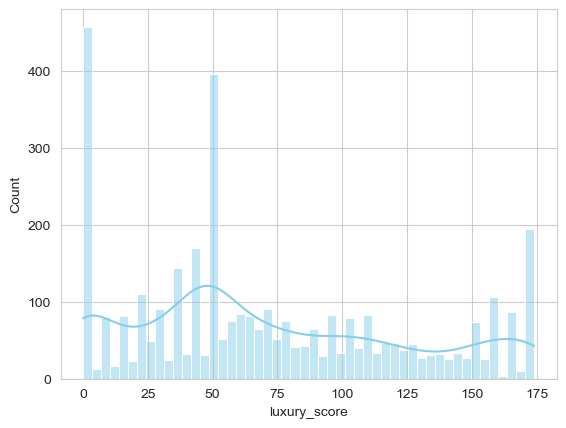

In [159]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

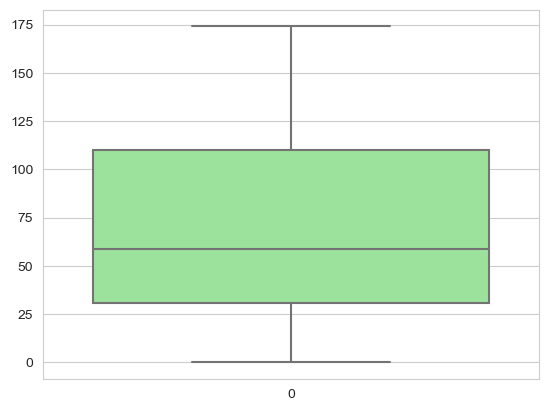

In [161]:
sns.boxplot(df['luxury_score'], color='lightgreen')

In [162]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,...,NaN,360.0,NaN,0,0,0,0,0,1,0
1,flat,emaar mgf the palm drive,sector 66,2.80,14358.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,...,1950.0,1920.0,1600.0,1,1,0,1,0,2,69
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,...,1689.0,NaN,1082.0,0,0,0,1,0,0,103
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,...,NaN,3240.0,NaN,0,1,0,0,0,1,20
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,...,NaN,1800.0,NaN,1,0,0,1,0,1,24
